In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

import functions_new_jit_primer as func
import importlib
importlib.reload(func)

import numba
from numba import cuda

In [2]:
def simulate_riot_primer(system, steps = 50):
    """
    Inputs:
        system := System class variable that contains all Agents
        steps := number of the simulation's time steps
    
    This functions simulates a set of 2 simultaneous riots that occur in 2 distinct sectors using the stochastic threshold model. There are a set of Agents in a reservoir that can
    enter sectors 0 or 1 to riot. Each sector has a size, so the thrsehold of each Agent is based on the number of Agents rioting in a sector compared with the number of Agents that
    can be in that sector.
     
    
    Outpurs:
         A np.array "progression" that contains the time evolution of each riots over time.
         A list "reservoirs" that contains all the system.reservoir numpy arrays of the simulation.
         A list "sector0s" that contains all the system.sector0 numpy arrays of the simulation.
         A list "sector1s" that contains all the system.sector1 numpy arrays of the simulation.
         
    """
    
    reservoirs = []
    sector0s = []
    sector1s = []
    reservoirs.append(np.copy(system.reservoir))
    sector0s.append(np.copy(system.sector0))
    sector1s.append(np.copy(system.sector1))
    progression = np.zeros((2,steps+1), dtype = np.int64)              # array that stores the riot's evolution over time
    
    for i in range(1,steps+1):
        system.update_wishes_reservoir()             # check reservoir Agents (enter riot)
        system.update_reservoir()                    # move Agents from reservoir
        reservoirs.append(np.copy(system.reservoir))
        sector0s.append(np.copy(system.sector0))
        sector1s.append(np.copy(system.sector1))
           
        progression[0][i] = len(system.sector0)
        progression[1][i] = len(system.sector1)
            
    return progression, reservoirs, sector0s, sector1s

In [3]:
def print_data(reservoirs, sector0s, sector1s):
    N = len(reservoirs)
    
    print(str(len(reservoirs)) + "\n")
    
    maxi = 0
    for i in range(len(reservoirs[0])):
        if reservoirs[0][i].threshold > maxi:
            maxi = reservoirs[0][i].threshold
    
    print(str(maxi) + "\n")
    
    for i in range(N):
        
        print("Reservoir")
        print(len(reservoirs[i]))
        if len(reservoirs[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(reservoirs[i])):
                a = str(reservoirs[i][j].name)
                b = str(reservoirs[i][j].threshold)
                if(reservoirs[i][j].name < 10):
                    a = "0" + a
                if(reservoirs[i][j].threshold < 10):
                    b = "0" + b
                print("[" + a + "," + b + "]", end = "")
                
        print("\n")
                
        print("Sector0")
        print(len(sector0s[i]))
        if len(sector0s[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(sector0s[i])):
                a = str(sector0s[i][j].name)
                b = str(sector0s[i][j].threshold)
                if(sector0s[i][j].name < 10):
                    a = "0" + a
                if(sector0s[i][j].threshold < 10):
                    b = "0" + b
                print("[" + a + "," + b + "]", end = "")
                
        print("\n")
        
        print("Sector1")
        print(len(sector1s[i]))
        if len(sector1s[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(sector1s[i])):
                a = str(sector1s[i][j].name)
                b = str(sector1s[i][j].threshold)
                if(sector1s[i][j].name < 10):
                    a = "0" + a
                if(sector1s[i][j].threshold < 10):
                    b = "0" + b
                print("[" + a + "," + b + "]", end = "")
                
        print("\n")

In [4]:
def write_data(reservoirs, sector0s, sector1s):

    file = open("simulation_data.txt", 'w')
    
    N = len(reservoirs)
    
    file.write(str(len(reservoirs)) + "\n")
    
    maxi = 0
    for i in range(len(reservoirs[0])):
        if reservoirs[0][i].threshold > maxi:
            maxi = reservoirs[0][i].threshold
    
    file.write(str(maxi) + "\n")
    
    for i in range(N):
        
        file.write("Reservoir\n")
        file.write(str(len(reservoirs[i])))
        file.write("\n")
        if len(reservoirs[i]) == 0:
            file.write("-1\n")
        else:
            for j in range(len(reservoirs[i])):
                a = str(reservoirs[i][j].name)
                b = str(reservoirs[i][j].threshold)
                if(reservoirs[i][j].name < 10):
                    a = "0" + a
                if(reservoirs[i][j].threshold < 10):
                    b = "0" + b
                file.write("[" + a + "," + b + "]")
            file.write("\n")
                
        file.write("\n")
                
        file.write("Sector0\n")
        file.write(str(len(sector0s[i])))
        file.write("\n")
        if len(sector0s[i]) == 0:
            file.write("-1\n")
        else:
            for j in range(len(sector0s[i])):
                a = str(sector0s[i][j].name)
                b = str(sector0s[i][j].threshold)
                if(sector0s[i][j].name < 10):
                    a = "0" + a
                if(sector0s[i][j].threshold < 10):
                    b = "0" + b
                file.write("[" + a + "," + b + "]")
            file.write("\n")
            
        file.write("\n")
        
        file.write("Sector1\n")
        file.write(str(len(sector1s[i])))
        file.write("\n")
        if len(sector1s[i]) == 0:
            file.write("-1\n")
        else:
            for j in range(len(sector1s[i])):
                a = str(sector1s[i][j].name)
                b = str(sector1s[i][j].threshold)
                if(sector1s[i][j].name < 10):
                    a = "0" + a
                if(sector1s[i][j].threshold < 10):
                    b = "0" + b
                file.write("[" + a + "," + b + "]")
            file.write("\n")
            
        file.write("\n")
        
    file.close()

    file = open(r"D:\UFMG\Projeto Primer\Unity\Simulation_Granovetter\Assets\simulation_data.txt", 'w')
    
    N = len(reservoirs)
    
    file.write(str(len(reservoirs)) + "\n")
    file.write(str(maxi) + "\n")
    
    for i in range(N):
        
        file.write("Reservoir\n")
        file.write(str(len(reservoirs[i])))
        file.write("\n")
        if len(reservoirs[i]) == 0:
            file.write("-1\n")
        else:
            for j in range(len(reservoirs[i])):
                a = str(reservoirs[i][j].name)
                b = str(reservoirs[i][j].threshold)
                if(reservoirs[i][j].name < 10):
                    a = "0" + a
                if(reservoirs[i][j].threshold < 10):
                    b = "0" + b
                file.write("[" + a + "," + b + "]")
            file.write("\n")
                
        file.write("\n")
                
        file.write("Sector0\n")
        file.write(str(len(sector0s[i])))
        file.write("\n")
        if len(sector0s[i]) == 0:
            file.write("-1\n")
        else:
            for j in range(len(sector0s[i])):
                a = str(sector0s[i][j].name)
                b = str(sector0s[i][j].threshold)
                if(sector0s[i][j].name < 10):
                    a = "0" + a
                if(sector0s[i][j].threshold < 10):
                    b = "0" + b
                file.write("[" + a + "," + b + "]")
            file.write("\n")
            
        file.write("\n")
        
        file.write("Sector1\n")
        file.write(str(len(sector1s[i])))
        file.write("\n")
        if len(sector1s[i]) == 0:
            file.write("-1\n")
        else:
            for j in range(len(sector1s[i])):
                a = str(sector1s[i][j].name)
                b = str(sector1s[i][j].threshold)
                if(sector1s[i][j].name < 10):
                    a = "0" + a
                if(sector1s[i][j].threshold < 10):
                    b = "0" + b
                file.write("[" + a + "," + b + "]")
            file.write("\n")
            
        file.write("\n")
        
    file.close()

In [5]:
def create_thresholds_uniform(N = 100):
    """
    Inputs:
        Sample parameters:
          N := total number of agents
          average := average value of the normal distribution
          deviation := standard deviation of the normal distribution
    
    This function creates an array with N threshold values (0 <= x <= 100) according with a normal distribution with the given parameters.
          
    Outputs:      
        A np.array with the sorted thresholds values
    
    """
    
    thresholds = np.zeros(N)
    
    # generating the values
    for i in range(N):
        threshold = rd.uniform(0, 20)     # generates a random value according with a normal distribution

        if threshold < 0:
            threshold = 0
        elif threshold > 100:
            threshold = 100

        thresholds[i] = threshold
        
    #thresholds = sorted(thresholds) #sorts the array
    
    return thresholds

In [6]:
def create_agents_uniform(N = 100):
    """
    Inputs:
        N := total number of agents
        average := average value of the normal distribution
        deviation := standard deviation of the normal distribution
        
        The function creates an array of Agents according with the normal distribution of threshold values.
        
    Outputs:
        agents := array with all Agents
    
    """
    
    agents = numba.typed.List()
    
    thresholds = create_thresholds_uniform(N)
    
    for i in range(N):
        agents.append(func.Agent(thresholds[i]))
        
    return agents


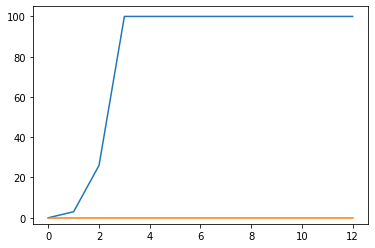

In [7]:
N = 100
average = 25
deviation = 12
model_type = 0 # 0 => Deterministic, 1 => Stochastic
beta = 0.2

agents = create_agents_uniform(N)

# manual threshold definition, list each agent's threshold in the thresholds array
"""
agents = numba.typed.List()
thresholds = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(thresholds)):
    agents.append(func.Agent(thresholds[i]))
"""

# naming the agents
func.name_agents(agents)

sector0_size = 100
sector1_size = 0
steps = 12

system = func.System(agents, sector0_size, sector1_size, model_type, beta)
progression, reservoirs, sector0s, sector1s = simulate_riot_primer(system, steps)

write_data(reservoirs, sector0s, sector1s)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3, N+5)
plt.show()

#print_data(reservoirs, sector0s, sector1s)